In [948]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure your code runs with RUN ALL. It should load the data that you're given, do all the processing, and spit out results. Comment out or remove anything that you've cleaned up and don't need - e.g. if you scaled a value manually, then moved that into a pipeline, don't leave the original scaling code active when the file is run.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

In [949]:
#Load Data
df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [950]:
df[393:396]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
393,24/11/2020 19:15:02,30.0,Male,Moscow,Software Engineer,5,0,Middle,C,C/C++,14712.0,0,30,Full-time employee,Unlimited contract,Russian,101-1000,Product
394,24/11/2020 19:15:49,33.0,Male,Berlin,Product Manager,5,5,Senior,NaN,Python,70000.0,800,30,Full-time employee,NaN,German,101-1000,Product
395,24/11/2020 19:19:30,35.0,Male,Berlin,QA Engineer,11,10,Senior,Java,"Python, Javascript / Typescript, .NET, Java / ...",74400.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [951]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product


In [952]:
#df.info()
df["Other technologies/programming languages you use often"].value_counts()

Javascript / Typescript                                                                   44
Python                                                                                    37
SQL                                                                                       31
AWS, Docker                                                                               16
Kotlin                                                                                    15
                                                                                          ..
Python, Ruby, Java / Scala, Go, Rust, AWS, Kubernetes, Docker, Terraform, helm, packer     1
Kotlin, SQL, AWS, Kubernetes, Docker                                                       1
Python, R, Go                                                                              1
C/C++, PHP, SQL                                                                            1
Python, AWS, Kubernetes, Docker, terraform, ansible                   

In [953]:
df.sample(20)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
803,26/11/2020 22:35:44,31.0,Male,Nuremberg,QA Engineer,9,5,Middle,Java,"Javascript / Typescript, Java / Scala",60000.0,65000,30,Full-time employee,Unlimited contract,English,1000+,Product
983,30/11/2020 18:39:45,28.0,Male,warsaw,Data Scientist,3,0,Middle,Python,"Java / Scala, SQL, AWS, Google Cloud",50000.0,10000,21,Self-employed (freelancer),Unlimited contract,English,101-1000,Product
742,26/11/2020 09:13:05,32.0,Female,Berlin,DevOps,9,5,Middle,"Terraform, Kubernetes, AWS, GCP, Ansible, Puppet","Ruby, Java / Scala, SQL, Go, AWS, Google Cloud...",74000.0,10000,40,Full-time employee,Unlimited contract,English,101-1000,Product
664,25/11/2020 18:24:15,30.0,Male,Berlin,Software Engineer,8,2,Senior,JS,NaN,60000.0,0,~25,Full-time employee,Unlimited contract,English,51-100,Product
432,24/11/2020 21:05:56,27.0,Male,Berlin,Tech Lead / Full-Stack,5,3.5,Lead,Python / JavaScript (React),"Python, Javascript / Typescript, SQL, AWS, Doc...",90000.0,1000,30 in contract (but theoretically unlimited),Full-time employee,Unlimited contract,English,11-50,Startup
802,26/11/2020 22:09:35,28.0,Male,Munich,IT Manager,6,3,Middle,NaN,Azure,65000.0,10000,28,Full-time employee,Unlimited contract,English,51-100,Consulting / Agency
1125,08/12/2020 09:39:49,34.0,Male,Munich,DevOps,12,2,Middle,Java,"Python, SQL, Perl",72000.0,8000,28,Full-time employee,Unlimited contract,English,101-1000,Product
884,28/11/2020 07:10:16,33.0,Male,Berlin,Product Manager,5,5,Middle,PM tools,NaN,70000.0,0,26,Full-time employee,Temporary contract,English,1000+,Product
801,26/11/2020 21:50:13,42.0,Male,Berlin,Software Engineer,20,2,Senior,PHP,"PHP, Javascript / Typescript, AWS, Docker",65000.0,5000,27,Full-time employee,Unlimited contract,English,101-1000,Startup
94,24/11/2020 11:49:06,32.0,Female,Berlin,Product Manager,8,8,No level,NaN,NaN,55000.0,NaN,27,Full-time employee,Unlimited contract,German,11-50,Consulting / Agency


In [954]:
#Construct a Target
df["Bonus"] = pd.to_numeric(df["Yearly bonus + stocks in EUR"], downcast="float", errors="coerce")
df["Bonus"].fillna(0, inplace=True)
df["target"] = df["Yearly brutto salary (without bonus and stocks) in EUR"] + df["Bonus"]
df.drop(columns={"Timestamp","Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Bonus"}, inplace=True)
df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,target
0,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",30,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",29,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0


EDA

In [955]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     1226 non-null   float64
 1   Gender                                                  1243 non-null   object 
 2   City                                                    1253 non-null   object 
 3   Position                                                1247 non-null   object 
 4   Total years of experience                               1237 non-null   object 
 5   Years of experience in Germany                          1221 non-null   object 
 6   Seniority level                                         1241 non-null   object 
 7   Your main technology / programming language             1126 non-null   object 
 8   Other technologies/programming languag

Cleaning Categorical Data

In [956]:
#function for low frequency (From Sample_exploration)
def replace_low_freq(d, col, threshold=10, replacement='other'):
    value_counts = d[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp

In [957]:
#fill nulls
df['Сontract duration'].fillna(value=df['Сontract duration'].mode().sum(), inplace=True)
df['Сontract duration'].value_counts()



Unlimited contract    1188
Temporary contract      64
0                        1
Name: Сontract duration, dtype: int64

In [958]:
#Replace low frequency with "Other"
df["Сontract duration"] = replace_low_freq(df, "Сontract duration", 10, "Other")
df["Сontract duration"].value_counts()
#df['Сontract duration']=df['Сontract duration'].astype('float64')

Unlimited contract    1188
Temporary contract      64
Other                    1
Name: Сontract duration, dtype: int64

In [959]:
df['Company type'].fillna(value=df['Company type'].mode().sum(), inplace=True)
df['Company type'].value_counts()

Product                785
Startup                252
Consulting / Agency    142
Bank                     5
Media                    3
                      ... 
Publisher                1
Energy                   1
Enterprise               1
service                  1
eCommerce                1
Name: Company type, Length: 63, dtype: int64

In [960]:
df["Company type"] = replace_low_freq(df, "Company type", 5, "Other") #look at the main company types
df["Company type"].value_counts()
#df['Company type']=df['Company type'].astype('float64')

Product                785
Startup                252
Consulting / Agency    142
Other                   74
Name: Company type, dtype: int64

In [961]:
df['Main language at work'].fillna(value=df['Main language at work'].mode().sum(), inplace=True)
df['Main language at work'].value_counts()

English               1036
German                 186
Russian                 12
Italian                  3
Spanish                  3
English and German       2
Polish                   2
Русский                  2
Czech                    2
50/50                    1
Deuglisch                1
French                   1
both                     1
Russian, English         1
Name: Main language at work, dtype: int64

In [962]:
df["Main language at work"] = replace_low_freq(df, "Main language at work", 10, "Other")
#df['Main language at work']=df['Main language at work'].astype('float64')
df["Main language at work"].value_counts()

English    1036
German      186
Other        19
Russian      12
Name: Main language at work, dtype: int64

In [963]:
df['Employment status'].fillna(value=df['Employment status'].mode().sum(), inplace=True)
df['Employment status'].value_counts()

Full-time employee                                                                 1207
Self-employed (freelancer)                                                           28
Part-time employee                                                                    8
Founder                                                                               3
Company Director                                                                      1
working student                                                                       1
Working Student                                                                       1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Werkstudent                                                                           1
Name: Employment status, dtype: 

In [964]:
df["Employment status"] = replace_low_freq(df, "Employment status", 2, "Other")
df["Employment status"].value_counts()
#3df['Employment status']=df['Employment status'].astype('float64')

Full-time employee            1207
Self-employed (freelancer)      28
Part-time employee               8
Other                            7
Founder                          3
Name: Employment status, dtype: int64

In [965]:
df['Position '].fillna(value=df['Position '].mode().sum(), inplace=True)
df['Position '].value_counts()

Software Engineer            393
Backend Developer            174
Data Scientist               110
Frontend Developer            89
QA Engineer                   71
                            ... 
Testautomation                 1
Recruiter                      1
DBA                            1
DB developer/Data analyst      1
IT Operations Manager          1
Name: Position , Length: 148, dtype: int64

In [966]:
df["Position "] = replace_low_freq(df, "Position ", 50, "Other")
df["Position "].value_counts()
#df['Position']=df['Position'].astype('float64')

Software Engineer     393
Other                 306
Backend Developer     174
Data Scientist        110
Frontend Developer     89
QA Engineer            71
DevOps                 57
Mobile Developer       53
Name: Position , dtype: int64

In [967]:
df['Gender'].fillna(value=df['Gender'].mode().sum(), inplace=True)
df["Gender"].value_counts()
#df['Gender']=df['Gender'].astype('float64')

Male       1059
Female      192
Diverse       2
Name: Gender, dtype: int64

In [968]:
df["City"].fillna(value=df["City"].mode().sum(), inplace=True)
df["City"].value_counts()


Berlin         681
Munich         236
Frankfurt       44
Hamburg         40
Stuttgart       26
              ... 
Nuremberg        1
Lübeck           1
Malta            1
Dresden          1
Saarbrücken      1
Name: City, Length: 119, dtype: int64

In [969]:
df["City"] = replace_low_freq(df, "City", 10, "Other")
df["City"].value_counts()

#df['City']=df['City'].astype('float64')

Berlin       681
Munich       236
Other        206
Frankfurt     44
Hamburg       40
Stuttgart     26
Cologne       20
Name: City, dtype: int64

In [970]:
df["Seniority level"].fillna(value=df["Seniority level"].mode().sum(), inplace=True)
df["Seniority level"].value_counts()

Senior                                       577
Middle                                       366
Lead                                         166
Junior                                        79
Head                                          44
Principal                                      3
student                                        1
Intern                                         1
Entry level                                    1
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                         1
Key                                            1
C-level executive manager                      1
Director                                       1
No level                                       1
CTO                                            1
Work Center Manager                            1
Manager             

In [971]:
df["Seniority level"] = replace_low_freq(df, "Seniority level", 10, "Other")
df["Seniority level"].value_counts()
#df['Seniority level']=df['Seniority level'].astype('float64')

Senior    577
Middle    366
Lead      166
Junior     79
Head       44
Other      21
Name: Seniority level, dtype: int64

In [972]:
df["Your main technology / programming language"].fillna(value=df["Your main technology / programming language"].mode().sum(), inplace=True)
df["Your main technology / programming language"] = replace_low_freq(df, "Your main technology / programming language", 10, "Other")
df["Your main technology / programming language"].value_counts()

Other         377
Java          311
Python        164
PHP            56
C++            38
JavaScript     34
Javascript     31
C#             30
python         26
Swift          24
Scala          24
Go             23
Kotlin         22
Python         21
Ruby           19
TypeScript     14
SQL            14
.NET           13
JS             12
Name: Your main technology / programming language, dtype: int64

In [973]:
df["Your main technology / programming language"].replace({"Javascript": "JavaScript", "Python ":"Python"}, inplace=True)
df["Your main technology / programming language"].value_counts()
#df['Your main technology / programming language']=df['Your main technology / programming language'].astype('float64')

Other         377
Java          311
Python        185
JavaScript     65
PHP            56
C++            38
C#             30
python         26
Swift          24
Scala          24
Go             23
Kotlin         22
Ruby           19
TypeScript     14
SQL            14
.NET           13
JS             12
Name: Your main technology / programming language, dtype: int64

In [974]:
df["Other technologies/programming languages you use often"].fillna(value=df["Other technologies/programming languages you use often"].mode().sum(), inplace=True)
df["Other technologies/programming languages you use often"].value_counts()

Javascript / Typescript                                                                   201
Python                                                                                     37
SQL                                                                                        31
AWS, Docker                                                                                16
Kotlin                                                                                     15
                                                                                         ... 
Python, Ruby, Java / Scala, Go, Rust, AWS, Kubernetes, Docker, Terraform, helm, packer      1
Kotlin, SQL, AWS, Kubernetes, Docker                                                        1
Python, R, Go                                                                               1
C/C++, PHP, SQL                                                                             1
Python, AWS, Kubernetes, Docker, terraform, ansible         

In [975]:
df["Other technologies/programming languages you use often"] = replace_low_freq(df, "Other technologies/programming languages you use often", 10, "Other")
df["Other technologies/programming languages you use often"].value_counts()
#df['Other technologies/programming languages you use often']=df['Other technologies/programming languages you use often'].astype('float64')

Other                                        891
Javascript / Typescript                      201
Python                                        37
SQL                                           31
AWS, Docker                                   16
Kotlin                                        15
C/C++                                         13
Swift                                         13
Python, SQL                                   13
Javascript / Typescript, SQL, AWS, Docker     12
Python, C/C++                                 11
Name: Other technologies/programming languages you use often, dtype: int64

In [976]:
df["Company size"].value_counts()
df['Company size'].fillna(value=df['Company size'].mode().sum(), inplace=True)
#df['Company size']=df['Company size'].astype('float64')


Cleaning Numerical Data

In [977]:
df["Total years of experience"] = pd.to_numeric(df["Total years of experience"], errors='coerce')
df["Total years of experience"] = df["Total years of experience"].fillna(value=df["Total years of experience"].mean())
df["Total years of experience"].value_counts()

10.00000     138
5.00000      136
6.00000       99
8.00000       92
7.00000       84
4.00000       80
12.00000      67
3.00000       66
15.00000      63
9.00000       60
2.00000       57
11.00000      43
13.00000      41
14.00000      39
1.00000       31
20.00000      28
9.07813       23
16.00000      20
18.00000      16
17.00000      12
19.00000       7
25.00000       7
0.00000        6
22.00000       5
2.50000        4
30.00000       4
21.00000       3
4.50000        2
27.00000       2
3.50000        2
1.50000        2
23.00000       2
0.80000        2
31.00000       1
24.00000       1
383.00000      1
40.00000       1
29.00000       1
28.00000       1
7.50000        1
26.00000       1
5.50000        1
6.50000        1
Name: Total years of experience, dtype: int64

In [978]:
df["Years of experience in Germany"] = pd.to_numeric(df["Total years of experience"], errors='coerce')
df["Years of experience in Germany"] = df["Total years of experience"].fillna(value=df["Years of experience in Germany"].mean())
df["Years of experience in Germany"].value_counts()

10.00000     138
5.00000      136
6.00000       99
8.00000       92
7.00000       84
4.00000       80
12.00000      67
3.00000       66
15.00000      63
9.00000       60
2.00000       57
11.00000      43
13.00000      41
14.00000      39
1.00000       31
20.00000      28
9.07813       23
16.00000      20
18.00000      16
17.00000      12
19.00000       7
25.00000       7
0.00000        6
22.00000       5
2.50000        4
30.00000       4
21.00000       3
4.50000        2
27.00000       2
3.50000        2
1.50000        2
23.00000       2
0.80000        2
31.00000       1
24.00000       1
383.00000      1
40.00000       1
29.00000       1
28.00000       1
7.50000        1
26.00000       1
5.50000        1
6.50000        1
Name: Years of experience in Germany, dtype: int64

In [979]:
df["Number of vacation days"] = pd.to_numeric(df["Number of vacation days"], errors='coerce')
df["Number of vacation days"] = df["Number of vacation days"].fillna(value=df["Number of vacation days"].mean())
df["Number of vacation days"].value_counts()

30.000000     488
28.000000     233
27.000000     102
25.000000      91
28.348549      81
26.000000      71
24.000000      67
29.000000      24
20.000000      13
21.000000      10
31.000000       8
22.000000       8
32.000000       8
36.000000       5
35.000000       5
0.000000        4
23.000000       4
40.000000       4
33.000000       3
14.000000       3
45.000000       3
12.000000       2
15.000000       2
37.500000       1
34.000000       1
39.000000       1
37.000000       1
5.000000        1
1.000000        1
365.000000      1
99.000000       1
50.000000       1
3.000000        1
16.000000       1
60.000000       1
38.000000       1
10.000000       1
Name: Number of vacation days, dtype: int64

In [980]:
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
df["Age"] = df["Age"].fillna(value=df["Age"].mean())
df["Age"].value_counts()

30.000000    110
32.000000     94
33.000000     94
31.000000     87
28.000000     87
29.000000     86
35.000000     82
34.000000     74
36.000000     60
26.000000     59
27.000000     58
38.000000     48
37.000000     44
25.000000     42
40.000000     31
24.000000     28
39.000000     28
32.509788     27
42.000000     20
41.000000     14
23.000000     12
45.000000     11
43.000000     10
22.000000      8
44.000000      8
46.000000      8
48.000000      4
47.000000      3
54.000000      2
49.000000      2
56.000000      2
53.000000      1
65.000000      1
66.000000      1
50.000000      1
51.000000      1
21.000000      1
20.000000      1
59.000000      1
69.000000      1
52.000000      1
Name: Age, dtype: int64

<Axes: xlabel='Company type', ylabel='count'>

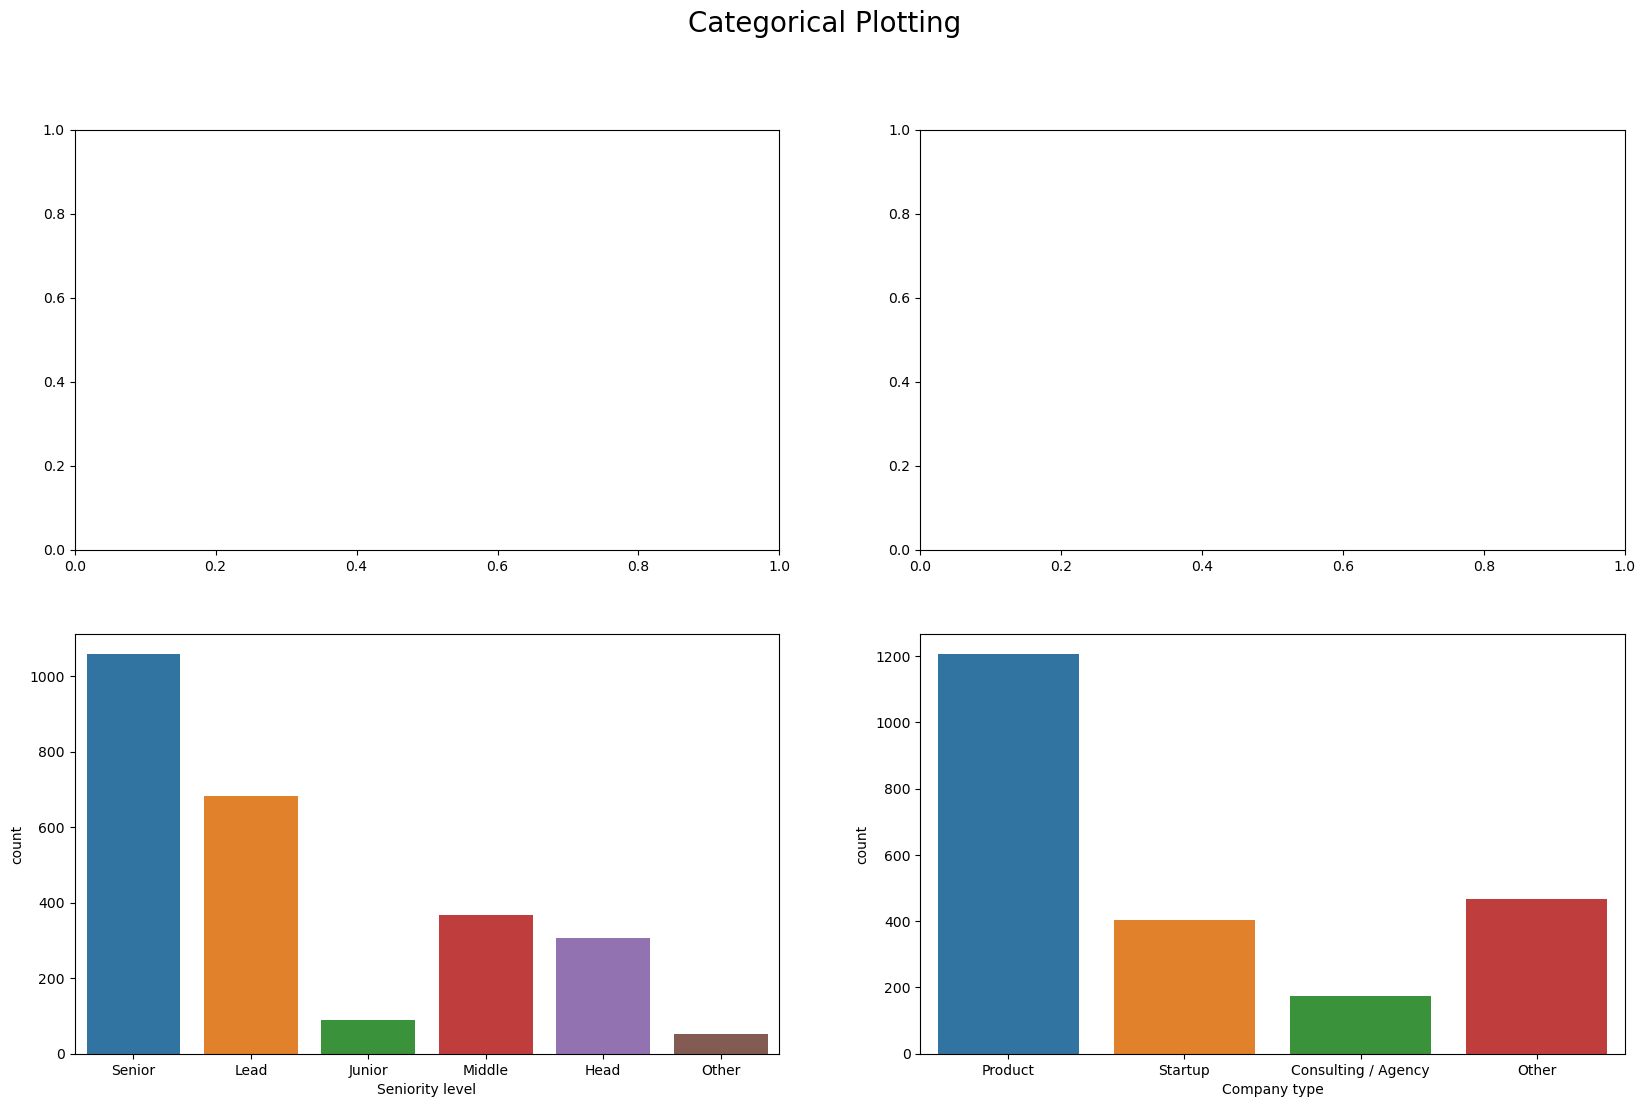

In [981]:
#Countplots
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,12))
fig.suptitle("Categorical Plotting", fontsize=20)
sns.countplot(x="Gender", data=df,ax=ax[1,0])
sns.countplot(x="City", data=df,ax=ax[1,0])
sns.countplot(x="Position ", data=df,ax=ax[1,0])
sns.countplot(x="Seniority level", data=df,ax=ax[1,0])
sns.countplot(x="Employment status", data=df,ax=ax[1,1])
sns.countplot(x="Сontract duration", data=df,ax=ax[1,1])
sns.countplot(x="Main language at work", data=df,ax=ax[1,1])
sns.countplot(x="Company size", data=df,ax=ax[1,1])
sns.countplot(x="Company type", data=df,ax=ax[1,1])

Creating the Models

In [982]:
y = df["target"].values.reshape(-1,1)
X = df.drop(columns=["target"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [983]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_features = ["Age", "Total years of experience", "Years of experience in Germany", "Number of vacation days"]
numeric_transformer = Pipeline( steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", MinMaxScaler())
    ])

categorical_features = ["Gender", "City", "Position ", "Seniority level", "Your main technology / programming language", "Other technologies/programming languages you use often", "Employment status", "Сontract duration", "Main language at work", "Company size"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer( remainder='drop',
        transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
          ])



In [984]:
import time
from sklearn.feature_selection import SelectFromModel
pipe_LR_steps = [('preprocessor', preprocessor), ('model', LinearRegression())]
pipe_LR = Pipeline(pipe_LR_steps)

start = time.process_time()
pipe_LR.fit(X_train, y_train)
print(time.process_time() - start)


print('Training CrossVal Score:', cross_val_score(pipe_LR, X_train, y_train, cv=5))
print('Testing score:', pipe_LR.score(X_test, y_test))

y_pred = pipe_LR.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
print('Test R² score:', test_r2)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', test_rmse)

0.015625
Training CrossVal Score: [-1.65329927e+08 -6.12668560e+08 -1.18605694e+08 -5.57903327e-03
 -3.66335310e+07]
Testing score: -22936574.91404826
Test R² score: -22936574.91404826
Test RMSE: 369188892.5934428


In [985]:
pipe_SGD_steps = [('preprocessor', preprocessor), ('model', SGDRegressor(max_iter=10000, eta0=.1))]
pipe_SGD = Pipeline(pipe_SGD_steps)

start = time.process_time()
pipe_SGD.fit(X_train, y_train.ravel())
print(time.process_time() - start)

#Print best model and test score
print('Training CrossVal Score:', cross_val_score(pipe_SGD, X_train, y_train.ravel(), cv=5))
print('Testing score:', pipe_SGD.score(X_test, y_test))

y_pred = pipe_LR.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
print('Test R² score:', test_r2)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', test_rmse)

0.015625
Training CrossVal Score: [-1.08123525e+08 -1.29055902e+08 -2.19442451e+08 -5.57911229e-03
 -6.50541376e+07]
Testing score: -55102587.40576649
Test R² score: -22936574.91404826
Test RMSE: 369188892.5934428


Feature Selection

In [986]:
#Lasso Method
l1_model = Lasso(alpha=0.2, max_iter=10000)
l2_model = Ridge(alpha=0.2)
pipeline_steps = [('pre', preprocessor),('model', l1_model) ]
pipe = Pipeline(pipeline_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe.fit(X_train, y_train)
cvs = cross_val_score(pipe, X_train, y_train.ravel(), cv=5)
print('Training CrossVal Score:', cvs)
print("Average Train Score:", np.mean(cvs))
print('Testing score:', pipe.score(X_test, y_test))
y_pred = pipe_LR.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
print('Test R² score:', test_r2)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', test_rmse)

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.714622372502023e+21, tolerance: 9.989333380864733e+17
  model = cd_fast.sparse_enet_coordinate_descent(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6532988633096053e+21, tolerance: 9.986667494626427e+17
  model = cd_fast.sparse_enet_coordinate_descent(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.089600805437048e+21, tolerance: 9.986667574782764e+17
  model = cd_fast.sparse_enet_coordinate_descent(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Obj

Training CrossVal Score: [-1.70176637e+08 -5.34725395e-03 -1.40342561e+08 -8.63921721e+07
 -2.23716640e+08]
Average Train Score: -124125602.03661415
Testing score: -1.9725010547833333
Test R² score: -3.3122596969145306
Test RMSE: 643503220.3559297


d:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.678369540232629e+21, tolerance: 9.986684991891007e+17
  model = cd_fast.sparse_enet_coordinate_descent(


In [987]:
#Elasitc Method
from sklearn.linear_model import ElasticNet

el_model = ElasticNet(max_iter=10000)
pipeline_steps = [('pre', preprocessor),('model', el_model) ]
pipe3 = Pipeline(pipeline_steps)
params = {'model__l1_ratio':[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]}
 
est = GridSearchCV(pipe3, param_grid=params, cv=5, n_jobs=-1) 
est.fit(X_train, y_train.ravel())
best = est.best_estimator_
print(best.score(X_test, y_test.ravel()))
print(best)

-0.1459801295362142
Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age',
                                                   'Total years of experience',
                                                   'Years of experience in '
                                                   'Germany',
                                                   'Number of vacation days']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'City',


d:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.979476802165176e+21, tolerance: 9.989333380864733e+17
  model = cd_fast.sparse_enet_coordinate_descent(


Changes to the Model

In [988]:
df1 = df 
df2 = df1.drop(columns=['Your main technology / programming language','Other technologies/programming languages you use often','Main language at work']) #testing theory of these columns aren't needed
df2.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Number of vacation days,Employment status,Сontract duration,Company size,Company type,target
0,26.0,Male,Munich,Software Engineer,5.0,5.0,Senior,30.0,Full-time employee,Unlimited contract,51-100,Product,85000.0
1,26.0,Male,Berlin,Backend Developer,7.0,7.0,Senior,28.0,Full-time employee,Unlimited contract,101-1000,Product,80000.0
2,29.0,Male,Berlin,Software Engineer,12.0,12.0,Lead,30.0,Self-employed (freelancer),Temporary contract,101-1000,Product,240000.0
3,28.0,Male,Berlin,Frontend Developer,4.0,4.0,Junior,24.0,Full-time employee,Unlimited contract,51-100,Startup,54000.0
4,37.0,Male,Berlin,Backend Developer,17.0,17.0,Senior,29.0,Full-time employee,Unlimited contract,101-1000,Product,62000.0


In [989]:
y2 = df2["target"].values.reshape(-1,1)
X2 = df2.drop(columns=["target"])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [990]:
numeric_features2 = ["Age", "Total years of experience", "Years of experience in Germany", "Number of vacation days"]
numeric_transformer2 = Pipeline( steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", MinMaxScaler())
    ])

categorical_features2 = ["Gender", "City", "Position ", "Seniority level", "Employment status", "Сontract duration", "Company size"]
categorical_transformer2 = OneHotEncoder(handle_unknown="ignore")

preprocessor2 = ColumnTransformer( remainder='drop',
        transformers=[
        ("num", numeric_transformer2, numeric_features2),
        ("cat", categorical_transformer2, categorical_features2),
          ])

In [991]:
l1_model = Lasso(alpha=0.2, max_iter=10000)
l2_model = Ridge(alpha=0.2)
pipeline_steps2 = [('pre', preprocessor2),('model', l1_model) ]
pipe2 = Pipeline(pipeline_steps2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

pipe2.fit(X2_train, y2_train)
cvs = cross_val_score(pipe2, X2_train, y2_train.ravel(), cv=5)
print('Training CrossVal Score:', cvs)
print("Average Train Score:", np.mean(cvs))
print('Testing score:', pipe2.score(X2_test, y2_test))
#y2_pred = pipe_LR.predict(X2_test)

#test_r2 = r2_score(y2_test, y2_pred)
#print('Test R² score:', test_r2)

#test_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
#print('Test RMSE:', test_rmse)

Training CrossVal Score: [0.20980869 0.10550958 0.01981658 0.08106945 0.09191338]
Average Train Score: 0.10162353387206517
Testing score: -0.0035462584865959546


# Answers and Explainations
(Expand/modify as needed)

### Results
An intial EDA was performed to see the countplots of the categories, it was noticed that the data would require some cleaning. The main cleaning method used was to fill the nulls with the more frequent values for categorical data and the mean for the numerical data. Also for the categorical data it was found that there was lots of values of count 1, so many of the low count data was placed into a new value called "Other".

The results of the two models used (LinearRegression and SGDRegressor) are: 
    
Training CrossVal Score: [-1.65329927e+08 -6.12668560e+08 -1.18605694e+08 -5.57903327e-03 -3.66335310e+07]

Testing score: -22936574.91404826

Test R² score: -22936574.91404826

Test RMSE: 369188892.5934428

and

Training CrossVal Score: [-7.58103256e+07 -1.48200083e+08 -6.51506423e+07 -5.57901853e-03
 -3.28607153e+07]

Testing score: -7931104.383181536

Test R² score: -22936574.91404826

Test RMSE: 369188892.5934428

respectively.


### Feature Selection Activities

Lasso and Elastic methods were used, but the objects did not converge even with iterations of 10000, this might be due to the data not being cleaned properly.

With the Lasso selection we get:

Training CrossVal Score: [-1.52563216e+08 -8.27612313e+07 -5.34720332e-03 -1.35320966e+08
-2.16753795e+08]

Average Train Score: -117479841.48747687

Testing score: -2.2001336839120946

Test R² score: -0.7037891025815843

Test RMSE: 404488448.6473857

### Hyperparameter Changes

From interperting the data and looking at context, I would exclude the programining languages and main language from the model because those should not have much weight on the job.

### Conclusion

After removing the programing languges and main languages, while also using the Lasso method we get:

Training CrossVal Score: [-1.24917422e+08 -5.93721392e-03 -8.33612530e+07 -2.76381778e+07
 -1.12238765e+08]

Average Train Score: -69631123.5768046

Testing score: -15521827.585167427

Therefore from our results we can conclude that leaving the categories we took out and using the lasso feature selection provideded the best results. While we also have to consider that the data was no cleaned properly. 

